In [1]:
%%bigquery df --use_rest_api
SELECT
  depdelay as departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrdelay, 10) AS arrival_delay_deciles
FROM
  `cloud-training-demos.airline_ontime_data.flights`
WHERE
 depdelay is not null
GROUP BY
  depdelay
HAVING
  num_flights > 100
ORDER BY
  depdelay ASC

Query is running:   0%|          |

Downloading:   0%|          |

In [2]:
df.head()

,departure_delay,num_flights,arrival_delay_deciles
0,-60.0,281,"[-137.0, -65.0, -60.0, -55.0, -36.0, -16.0, -8..."
1,-45.0,262,"[-71.0, -55.0, -50.0, -48.0, -45.0, -43.0, -39..."
2,-44.0,123,"[-62.0, -53.0, -50.0, -48.0, -46.0, -42.0, -40..."
3,-43.0,161,"[-71.0, -55.0, -51.0, -48.0, -45.0, -43.0, -38..."
4,-42.0,193,"[-62.0, -51.0, -48.0, -46.0, -43.0, -41.0, -38..."


In [3]:
import pandas as pd

percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles.rename(columns = lambda x : '{0}%'.format(x*10), inplace=True)
percentiles.head()

,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-137.0,-65.0,-60.0,-55.0,-36.0,-16.0,-8.0,-4.0,1.0,8.0,54.0
1,-71.0,-55.0,-50.0,-48.0,-45.0,-43.0,-39.0,-32.0,-14.0,2.0,45.0
2,-62.0,-53.0,-50.0,-48.0,-46.0,-42.0,-40.0,-33.0,-22.0,-3.0,76.0
3,-71.0,-55.0,-51.0,-48.0,-45.0,-43.0,-38.0,-33.0,-18.0,-5.0,48.0
4,-62.0,-51.0,-48.0,-46.0,-43.0,-41.0,-38.0,-33.0,-20.0,-3.0,32.0


In [4]:
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

,departure_delay,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-60.0,-137.0,-65.0,-60.0,-55.0,-36.0,-16.0,-8.0,-4.0,1.0,8.0,54.0
1,-45.0,-71.0,-55.0,-50.0,-48.0,-45.0,-43.0,-39.0,-32.0,-14.0,2.0,45.0
2,-44.0,-62.0,-53.0,-50.0,-48.0,-46.0,-42.0,-40.0,-33.0,-22.0,-3.0,76.0
3,-43.0,-71.0,-55.0,-51.0,-48.0,-45.0,-43.0,-38.0,-33.0,-18.0,-5.0,48.0
4,-42.0,-62.0,-51.0,-48.0,-46.0,-43.0,-41.0,-38.0,-33.0,-20.0,-3.0,32.0


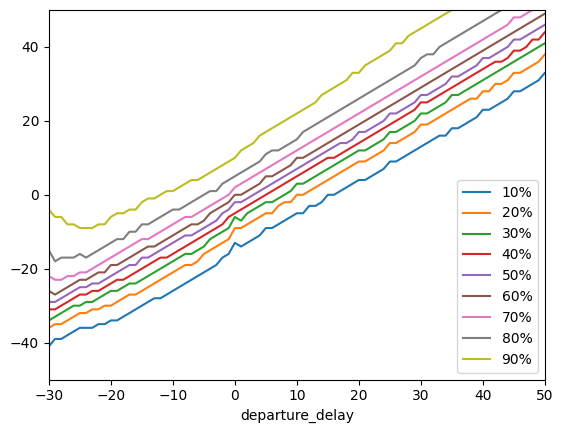

In [5]:
df.drop(labels=['0%', '100%'], axis=1, inplace=True)
df.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));